<a href="https://colab.research.google.com/github/WLAraujo/Projetos-Dirigidos---IEEE-CS/blob/main/Projeto_Dirigido_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este caderno visa realizar o Projeto Dirigido 3 do grupo de análise de dados da Computer Society - IEEE - UFABC.

Caderno de autoria de Wesley Lima de Araujo.

In [ ]:
!pip install --upgrade plotly
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.data as dt
import plotly.graph_objects as go
import plotly.data as dt
import numpy as np

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


# Parte 1 - Análise de suicídios

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016

suicide-rates-overview-1985-to-2016.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('suicide-rates-overview-1985-to-2016.zip', 'r')
zip_ref.extractall('suicide-rates-overview-1985-to-2016')
zip_ref.close()

In [ ]:
Suicidios=pd.read_csv('/content/suicide-rates-overview-1985-to-2016/master.csv')

In [ ]:
Suicidios

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## Passo 1

Crie um dataset somente com os dados de três países de sua escolha, usaremos essa nova base de dados.

In [ ]:
df1 = Suicidios.loc[(Suicidios["country"] == "Argentina") | (Suicidios["country"] == "Brazil") | (Suicidios["country"] == "Colombia")]

In [ ]:
df1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
6003,Colombia,2015,female,35-54 years,96,6566323,1.46,Colombia2015,NaN,"291,519,591,533",6552,Generation X
6004,Colombia,2015,female,75+ years,10,715044,1.40,Colombia2015,NaN,"291,519,591,533",6552,Silent
6005,Colombia,2015,female,55-74 years,45,3367078,1.34,Colombia2015,NaN,"291,519,591,533",6552,Boomers
6006,Colombia,2015,female,5-14 years,44,3904896,1.13,Colombia2015,NaN,"291,519,591,533",6552,Generation Z


In [ ]:
df1 = df1.reset_index(drop=True)

In [ ]:
df1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Colombia,2015,female,35-54 years,96,6566323,1.46,Colombia2015,NaN,"291,519,591,533",6552,Generation X
1112,Colombia,2015,female,75+ years,10,715044,1.40,Colombia2015,NaN,"291,519,591,533",6552,Silent
1113,Colombia,2015,female,55-74 years,45,3367078,1.34,Colombia2015,NaN,"291,519,591,533",6552,Boomers
1114,Colombia,2015,female,5-14 years,44,3904896,1.13,Colombia2015,NaN,"291,519,591,533",6552,Generation Z


In [ ]:
df2 = df1[["country", "year", " gdp_for_year ($) "]].copy()

In [ ]:
df2

,country,year,gdp_for_year ($)
0,Argentina,1985,"88,416,668,900"
1,Argentina,1985,"88,416,668,900"
2,Argentina,1985,"88,416,668,900"
3,Argentina,1985,"88,416,668,900"
4,Argentina,1985,"88,416,668,900"
...,...,...,...
1111,Colombia,2015,"291,519,591,533"
1112,Colombia,2015,"291,519,591,533"
1113,Colombia,2015,"291,519,591,533"
1114,Colombia,2015,"291,519,591,533"


In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2

,country,year,gdp_for_year ($)
0,Argentina,1985,"88,416,668,900"
12,Argentina,1986,"110,934,442,763"
24,Argentina,1987,"111,106,191,358"
36,Argentina,1988,"126,206,817,196"
48,Argentina,1989,"76,636,898,036"
...,...,...,...
1056,Colombia,2011,"335,415,156,702"
1068,Colombia,2012,"369,659,700,376"
1080,Colombia,2013,"380,191,881,860"
1092,Colombia,2014,"378,195,716,714"


In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2

,country,year,gdp_for_year ($)
0,Argentina,1985,"88,416,668,900"
1,Argentina,1986,"110,934,442,763"
2,Argentina,1987,"111,106,191,358"
3,Argentina,1988,"126,206,817,196"
4,Argentina,1989,"76,636,898,036"
...,...,...,...
88,Colombia,2011,"335,415,156,702"
89,Colombia,2012,"369,659,700,376"
90,Colombia,2013,"380,191,881,860"
91,Colombia,2014,"378,195,716,714"


## Passo 2

Crie um único gráfico com três linhas que mostrem a evolução do PIB de cada país ao longo do tempo.

In [ ]:
df3 = df2.copy()

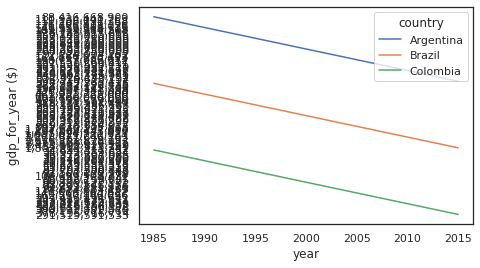

In [ ]:
sns.lineplot(data=df3, x="year", y=" gdp_for_year ($) ", hue="country")

In [ ]:
df3.dtypes

country               object
year                   int64
 gdp_for_year ($)     object
dtype: object

In [ ]:
df3[' gdp_for_year ($) '] = df3[' gdp_for_year ($) '].str.replace(",","")

In [ ]:
df3[' gdp_for_year ($) '] = df3[' gdp_for_year ($) '].astype(int)

In [ ]:
df3

,country,year,gdp_for_year ($)
0,Argentina,1985,88416668900
1,Argentina,1986,110934442763
2,Argentina,1987,111106191358
3,Argentina,1988,126206817196
4,Argentina,1989,76636898036
...,...,...,...
88,Colombia,2011,335415156702
89,Colombia,2012,369659700376
90,Colombia,2013,380191881860
91,Colombia,2014,378195716714


([<matplotlib.axis.XTick at 0x7fafa86b72d0>,
 <a list of 31 Text major ticklabel objects>)

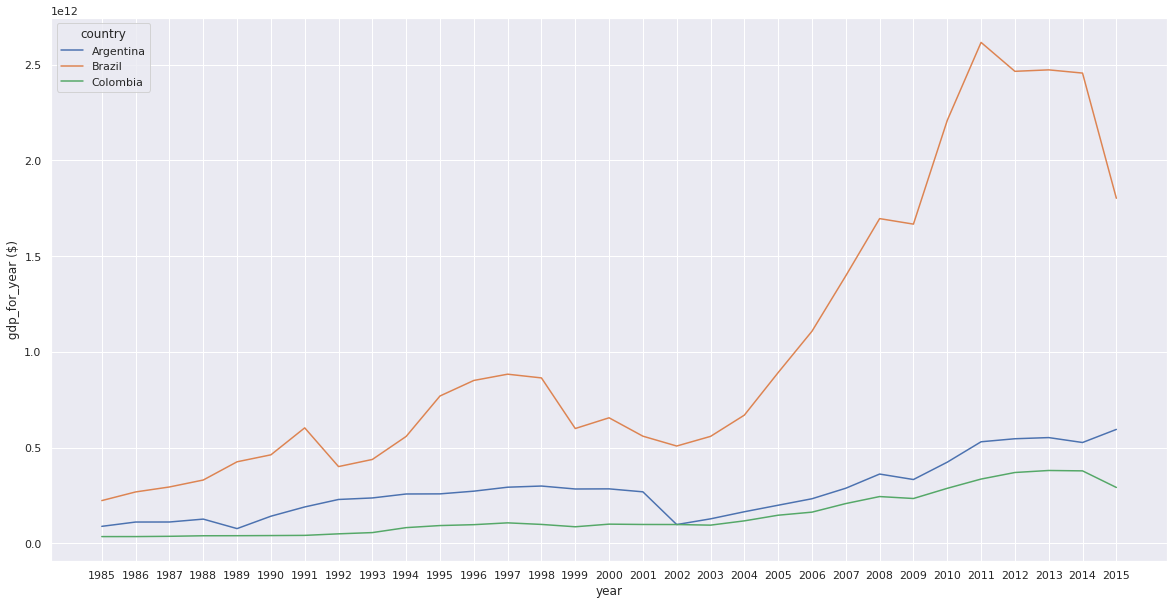

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=df3, x="year", y=" gdp_for_year ($) ", hue="country")
plt.xticks(ticks=df3["year"].unique())

## Passo 3

**Faça um resumo sobre o que pode ser observado no gráfico do passo 2?**

É possível ver que no gráfico do passo anterior que o PIB do Brasil desde o início dos registros tem sido maior que o dos outros dois países, além disso, o PIB da Argentina também nunca foi menor que o da Colombia. Também é possível ver que o PIB do Brasil é mais instável em alguns dos momentos, inclusive é o PIB com menor diminuição entre anos consecutivos.

## Passo 4

Escolha um dos três países e crie um grid (grade de gráficos, exemplo abaixo) que mostre a quantidade de suicídios para cada ano de registro fazendo a separação por faixas etárias e sexo. Em cada linha da grade considere um ano, em cada coluna considere uma faixa etária e em cada gráfico faça a separação por sexo.

In [ ]:
df4 = df1.loc[df1["country"] == "Argentina"].copy()

In [ ]:
df4

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
367,Argentina,2015,female,25-34 years,114,3235582,3.52,Argentina2015,NaN,"594,749,285,413",14981,Millenials
368,Argentina,2015,female,35-54 years,166,5301368,3.13,Argentina2015,NaN,"594,749,285,413",14981,Generation X
369,Argentina,2015,female,75+ years,27,1344980,2.01,Argentina2015,NaN,"594,749,285,413",14981,Silent
370,Argentina,2015,male,5-14 years,39,3672155,1.06,Argentina2015,NaN,"594,749,285,413",14981,Generation Z


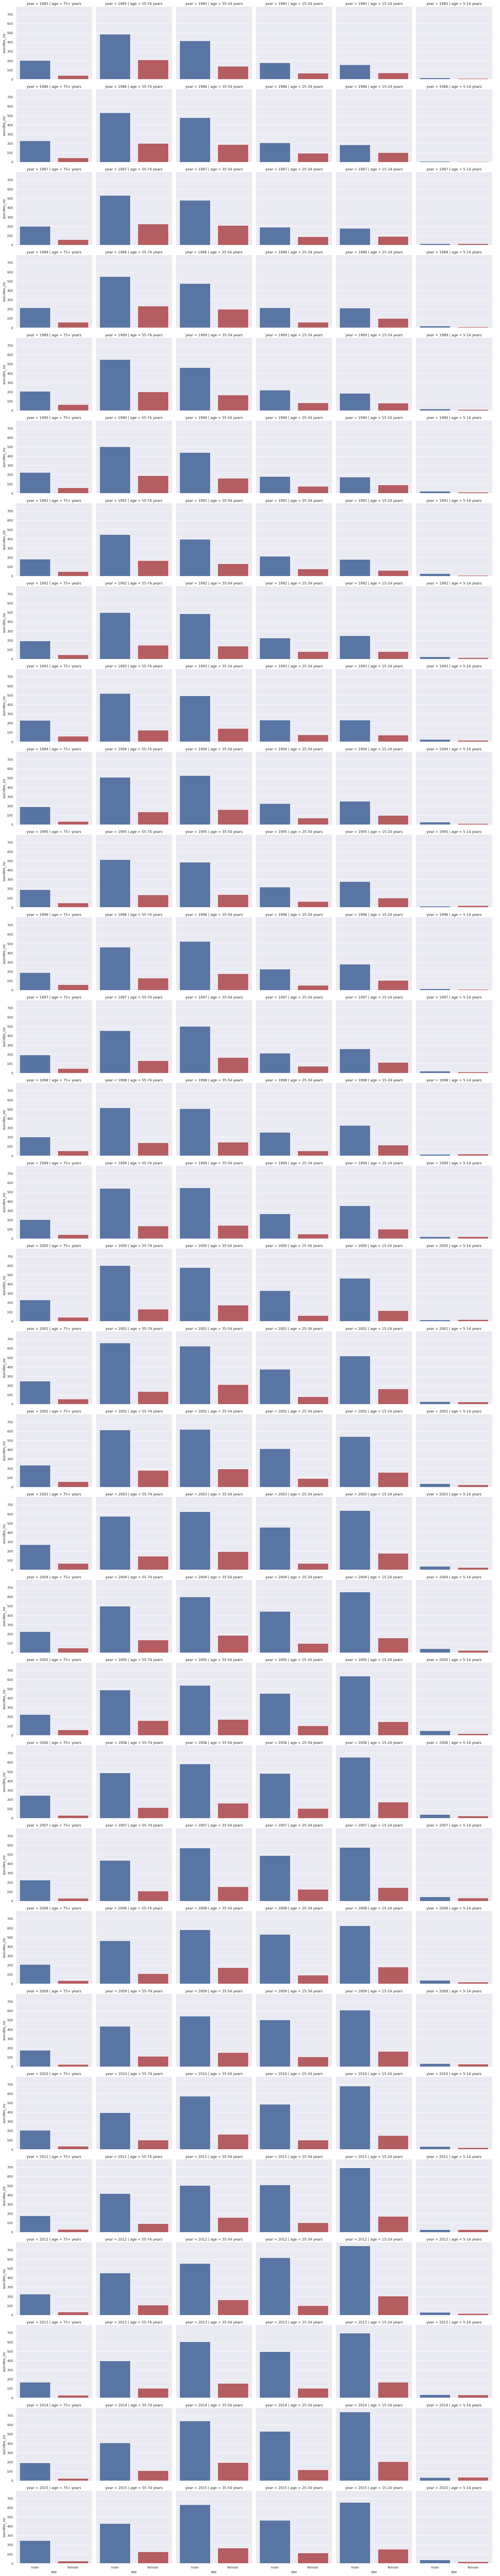

In [ ]:
g = sns.FacetGrid(df4, col="age", row = 'year', height=4)
g.map(sns.barplot, "sex", "suicides_no", order=["male", "female"], palette = {'male' : 'b', 'female': 'r'})
g.add_legend()

## Passo 5

**O que pode ser observado no grid construído no passo 4? Fale sobre como a influência das variáveis de gênero e faixa etária pode ser vista nos gráficos.**

Fica bem claro pelo grid que para parcelas etárias da população com uma porcentagem "relevante" da população existe grande diferença da taxa de suicidios entre os dois generos. É possível ver que, em praticamente todas as faixas etárias e anos em registro, o número de homens que se suicidou costuma ser maior que o de mulheres.

## Passo 6

Construa um gráfico de linhas que mostre a taxa total de suicídios ao longo do tempo para cada país.

In [ ]:
df5 = df1[['country', 'year', 'suicides_no']].copy()

In [ ]:
df5

,country,year,suicides_no
0,Argentina,1985,202
1,Argentina,1985,485
2,Argentina,1985,414
3,Argentina,1985,210
4,Argentina,1985,177
...,...,...,...
1111,Colombia,2015,96
1112,Colombia,2015,10
1113,Colombia,2015,45
1114,Colombia,2015,44


In [ ]:
df6 = df5.groupby(by=['country', 'year']).sum()

In [ ]:
df6

suicides_no
country   year             
Argentina 1985         1988
          1986         2284
          1987         2286
          1988         2354
          1989         2247
...                     ...
Colombia  2011         2044
          2012         2119
          2013         2068
          2014         2126
          2015         2332

[93 rows x 1 columns]

([<matplotlib.axis.XTick at 0x7faf8292b350>,
 <a list of 31 Text major ticklabel objects>)

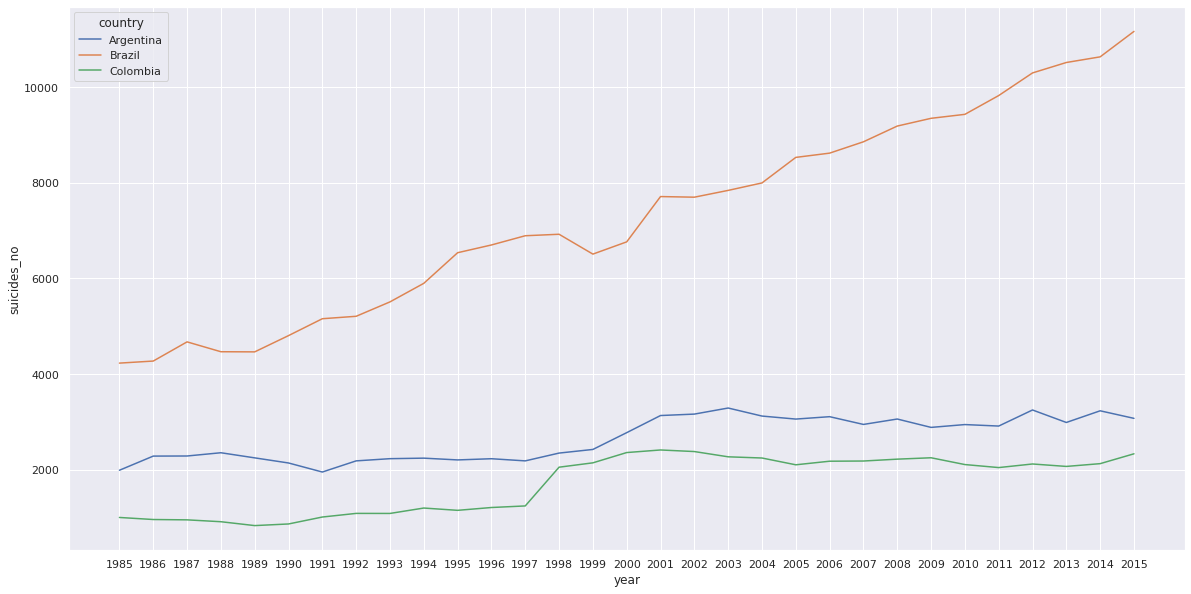

In [ ]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=df6, x="year", y="suicides_no", hue="country")
plt.xticks(ticks=df3["year"].unique())

## Passo 7

**Compare a evolução da taxa de suicídios dos três países.**

O Brasil vem numa crescente assutadora de suicídios em comparação aos seus vizinhos. Podemos ver que isso vai além de questões da população devido à taxa de variação ser muito mais alta que a dos outros dois países. Além disso podemos ver que as taxas de Argentina e Colombia são geralmente estáveis, tendo seu maior ponto de variação em um período semelhante.

# Parte 2 - Análise Play Store

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dhruvildave/top-play-store-games

  0% 0.00/72.1k [00:00<?, ?B/s]
100% 72.1k/72.1k [00:00<00:00, 30.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('top-play-store-games.zip', 'r')
zip_ref.extractall('top-play-store-games')
zip_ref.close()

In [ ]:
PlayStore=pd.read_csv('/content/top-play-store-games/android-games.csv')

In [ ]:
PlayStore

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


## Passo 1

Faça um gráfico de setores (pizza) em cima da coluna de categorias dos jogos.

In [ ]:
cat = PlayStore['category'].value_counts()
cat

GAME CARD            126
GAME WORD            104
GAME CASUAL          100
GAME ACTION          100
GAME CASINO          100
GAME PUZZLE          100
GAME BOARD           100
GAME RACING          100
GAME STRATEGY        100
GAME SPORTS          100
GAME MUSIC           100
GAME TRIVIA          100
GAME ADVENTURE       100
GAME SIMULATION      100
GAME EDUCATIONAL     100
GAME ARCADE          100
GAME ROLE PLAYING    100
Name: category, dtype: int64

In [ ]:
porc_cat = cat/PlayStore['category'].count()
porc_cat

GAME CARD            0.072832
GAME WORD            0.060116
GAME CASUAL          0.057803
GAME ACTION          0.057803
GAME CASINO          0.057803
GAME PUZZLE          0.057803
GAME BOARD           0.057803
GAME RACING          0.057803
GAME STRATEGY        0.057803
GAME SPORTS          0.057803
GAME MUSIC           0.057803
GAME TRIVIA          0.057803
GAME ADVENTURE       0.057803
GAME SIMULATION      0.057803
GAME EDUCATIONAL     0.057803
GAME ARCADE          0.057803
GAME ROLE PLAYING    0.057803
Name: category, dtype: float64

In [ ]:
porc_cat = porc_cat.to_frame()
porc_cat

,category
GAME CARD,0.072832
GAME WORD,0.060116
GAME CASUAL,0.057803
GAME ACTION,0.057803
GAME CASINO,0.057803
GAME PUZZLE,0.057803
GAME BOARD,0.057803
GAME RACING,0.057803
GAME STRATEGY,0.057803
GAME SPORTS,0.057803


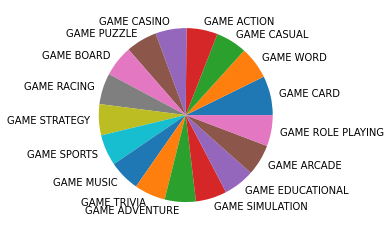

In [ ]:
x = plt.pie(porc_cat, labels=porc_cat.index)

## Passos 2 e 3

Faça um gráfico de dispersão que cruze as colunas que indicam as avaliações 5 estrelas e o total de avaliações.

Usando o mesmo gráfico do passo 2 trace uma linha de tendência.

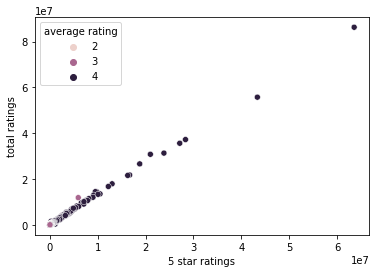

In [ ]:
sns.scatterplot(data = PlayStore, x = "5 star ratings", y = "total ratings", x_bins=20, y_bins=20, hue = "average rating")

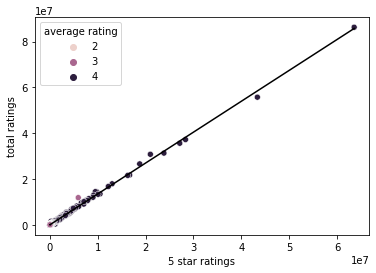

In [ ]:
graf = sns.scatterplot(data = PlayStore, x = "5 star ratings", y = "total ratings", x_bins=20, y_bins=20, hue = "average rating")
z = np.polyfit(PlayStore['5 star ratings'], PlayStore['total ratings'], 1)
p = np.poly1d(z)
plt.plot(PlayStore['5 star ratings'], p(PlayStore['5 star ratings']), c = 'black')

## Passo 4

**É possível observar alguma relação entre as colunas analisadas nos passos 2 e 3? Justifique com base na visualização criada.**

Podemos ver no gráfico do passo 3 que existe uma correlação muito forte entre os valores de quantidade de avaliações e a quantidade de avaliações 5 estrelas. Essa pode parecer ser uma relação até óbvia, pois quanto mais avaliações mais avaliações são 5 estrelas, fica como um questionamento se essa mesma relação vale para outras notas.